In [8]:
%matplotlib widget
import pandas as pd
import numpy as np
data = pd.read_excel("vasilis_data.xlsx",sheet_name="Experiment 1")
# data['speed (um.h-1)'] = data['HSPEED']/24
# data['density (pixel.cm-2)'] = data['ND']/(1.5**2)

In [9]:
data = data.loc[data['THL']<=30000]
data = data.loc[data['SD']<=150]

In [10]:
data = data.sort_values(by="SD")

data['Spore diameter (um)']=data['SD']

data['SASD']=data["SA"]*data["SD"]
data['logSASD']=np.log(data["SASD"])
data['logSD']=np.log(data["SD"])


In [11]:
data_dik = data.loc[data['Karyosis']=='Dikaryon'].copy()
data_hom = data.loc[data['Karyosis']=='Homokaryon'].copy()
rolling = 20
for sub_data in [data_hom,data_dik,data]:
    sub_data['THL_mean']=sub_data["THL"].rolling(rolling).mean()
    sub_data['THL_sup']=sub_data["THL"].rolling(rolling).quantile(0.9)
    sub_data['rolling average total_growth (um)']=sub_data['THL_mean']
    sub_data['rolling sup total_growth (um)']=sub_data['THL_sup']
    sub_data['logTHL']=np.log(sub_data["THL"])
    sub_data['logTHL_mean']=sub_data["logTHL"].rolling(rolling).mean()
    sub_data['logTHL_sup']=sub_data["logTHL"].rolling(rolling).quantile(0.9)

In [12]:
sub_data['THL_sup']=sub_data["THL"].rolling(rolling).quantile(0.9)

<AxesSubplot:xlabel='logSD', ylabel='logTHL_mean'>

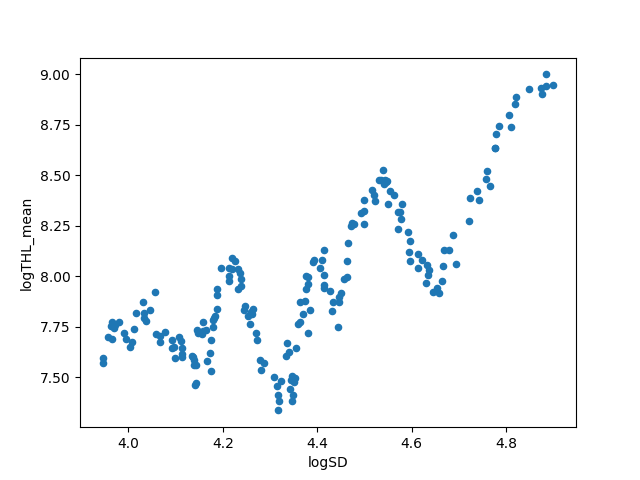

In [13]:
data.plot('logSD','logTHL_mean',kind="scatter")

<AxesSubplot:xlabel='SD', ylabel='THL_mean'>

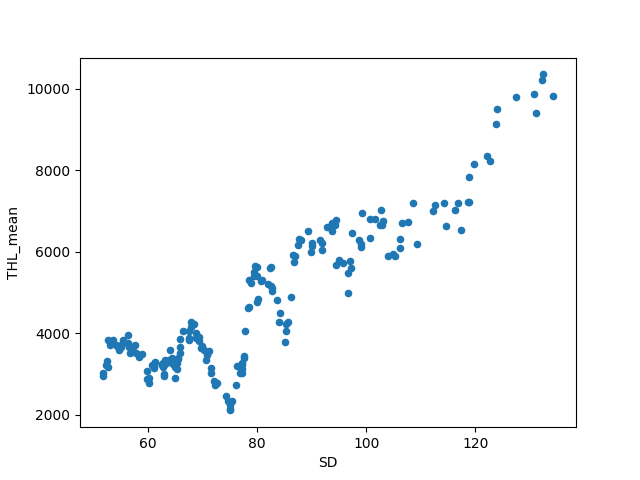

In [25]:
data.plot('SD','THL_mean',kind="scatter")

<AxesSubplot:xlabel='SD', ylabel='THL'>

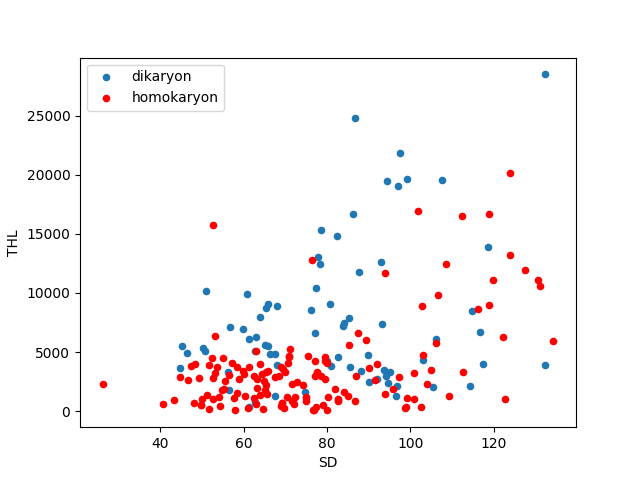

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
data_dik.plot('SD','THL',kind="scatter",ax=ax,label="dikaryon")
data_hom.plot('SD','THL',kind="scatter",ax=ax,color='red',label="homokaryon")

<AxesSubplot:xlabel='SD', ylabel='THL_sup'>

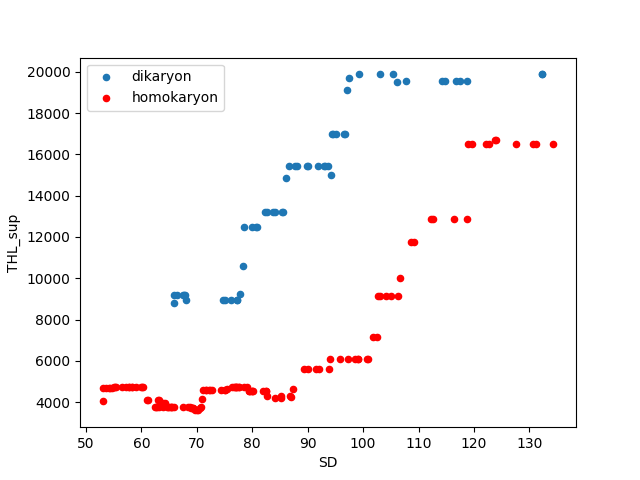

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
data_dik.plot('SD','THL_sup',kind="scatter",ax=ax,label="dikaryon")
data_hom.plot('SD','THL_sup',kind="scatter",ax=ax,color='red',label="homokaryon")
# data.plot('SD','THL_sup',kind="scatter",ax=ax,color='green')

<AxesSubplot:xlabel='SASD', ylabel='THL_sup'>

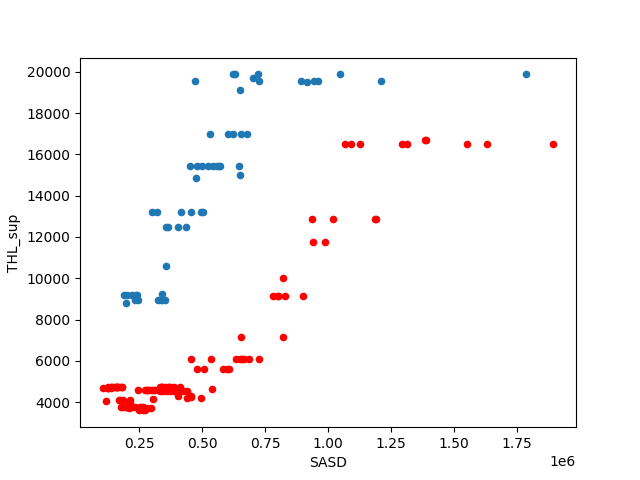

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
data_dik.plot('SASD','THL_sup',kind="scatter",ax=ax)
data_hom.plot('SASD','THL_sup',kind="scatter",ax=ax,color='red')

In [184]:
len(data)

218

<AxesSubplot:xlabel='Spore diameter (um)', ylabel='rolling sup total_growth (um)'>

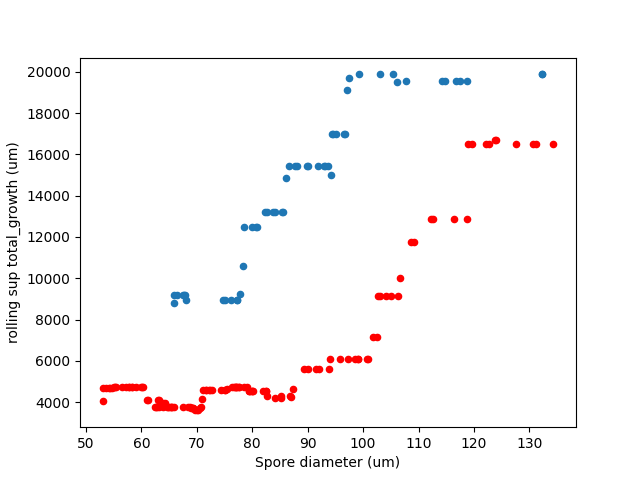

In [17]:
fig, ax = plt.subplots()
data_dik.plot('Spore diameter (um)','rolling sup total_growth (um)',kind="scatter",ax=ax)
data_hom.plot('Spore diameter (um)','rolling sup total_growth (um)',kind="scatter",ax=ax,color='red')

In [171]:
data.boxplot('SD',by="Strain")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:title={'center':'SD'}, xlabel='Strain'>

In [143]:
data.plot('SA','THL_mean',kind="scatter")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='SA', ylabel='THL_mean'>

In [20]:
import statsmodels.formula.api as sm
result = sm.ols(formula="THL ~ SD", data=data_hom).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    THL   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     47.91
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           1.48e-10
Time:                        07:46:52   Log-Likelihood:                -1353.3
No. Observations:                 142   AIC:                             2711.
Df Residuals:                     140   BIC:                             2716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2962.0311    999.042     -2.965      0.0

In [180]:
import statsmodels.formula.api as sm
result = sm.ols(formula="THL ~ SA", data=data_hom).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    THL   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     51.21
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           4.07e-11
Time:                        12:21:48   Log-Likelihood:                -1373.8
No. Observations:                 144   AIC:                             2752.
Df Residuals:                     142   BIC:                             2758.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    922.3471    487.363      1.893      0.0

In [181]:
import statsmodels.formula.api as sm
result = sm.ols(formula="THL ~ SASD", data=data_hom).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    THL   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     32.12
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           7.81e-08
Time:                        12:22:02   Log-Likelihood:                -1381.3
No. Observations:                 144   AIC:                             2767.
Df Residuals:                     142   BIC:                             2773.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2554.9472    366.176      6.977      0.0

In [220]:
import statsmodels.formula.api as sm
result = sm.ols(formula="logTHL_sup ~ logSD", data=data_dik).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             logTHL_sup   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     168.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           3.24e-18
Time:                        13:47:16   Log-Likelihood:                 30.508
No. Observations:                  56   AIC:                            -57.02
Df Residuals:                      54   BIC:                            -52.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8628      0.441      8.765      0.0

In [88]:
print(result.params)

Intercept   -663.709004
SD            74.359166
dtype: float64


In [55]:
from scipy.stats import pearsonr
import numpy as np
corr = data.corr()
pval = data.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*corr.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
# corr.style.background_gradient(cmap='coolwarm')
corr.round(2).astype(str) + p

,SD,SA,GT,HR,HD,TG,THL,BI,S,HGR,SG
SD,1.0***,0.93***,0.11,0.45***,0.11,0.07,0.32***,-0.04,0.1,0.35***,0.03
SA,0.93***,1.0***,0.07,0.5***,0.11,0.05,0.34***,-0.07,0.06,0.38***,0.1
GT,0.11,0.07,1.0***,-0.19***,-0.13*,0.03,0.05,0.15**,-0.07,0.05,-0.12*
HR,0.45***,0.5***,-0.19***,1.0***,0.11,-0.07,0.75***,-0.34***,0.07,0.77***,0.05
HD,0.11,0.11,-0.13*,0.11,1.0***,0.09,0.08,-0.11,0.16**,0.12*,0.23***
TG,0.07,0.05,0.03,-0.07,0.09,1.0***,-0.01,0.28***,0.06,0.02,-0.27***
THL,0.32***,0.34***,0.05,0.75***,0.08,-0.01,1.0***,-0.31***,-0.06,0.97***,-0.24***
BI,-0.04,-0.07,0.15**,-0.34***,-0.11,0.28***,-0.31***,1.0***,-0.15**,-0.32***,-0.12*
S,0.1,0.06,-0.07,0.07,0.16**,0.06,-0.06,-0.15**,1.0***,-0.05,-0.01
HGR,0.35***,0.38***,0.05,0.77***,0.12*,0.02,0.97***,-0.32***,-0.05,1.0***,-0.1


In [13]:
data

,REP,STRAIN,KAR,HOST,DERM,HSPEED,TSPOR,SPORES,HL,BF,ND
0,1,A5,Dik,Carrot,42,7500.000000,12,6412,1.257041e+07,0.113,34923
1,2,A5,Dik,Carrot,13,7500.000000,27,5251,1.368254e+07,0.135,44074
2,3,A5,Dik,Carrot,9,7500.000000,34,4873,1.089962e+07,0.122,43776
3,4,A5,Dik,Carrot,17,7500.000000,25,5986,1.131000e+07,0.126,44504
4,5,A5,Dik,Carrot,17,7500.000000,27,5487,1.274170e+07,0.137,38779
5,6,A5,Dik,Carrot,21,7500.000000,31,4786,9.856333e+06,0.114,35845
16,1,A4,Dik,Carrot,16,4285.714286,52,1810,1.232100e+07,0.147,43284
17,2,A4,Dik,Carrot,18,6000.000000,46,4005,1.684460e+07,0.166,47382
18,3,A4,Dik,Carrot,23,7500.000000,26,3899,1.411000e+07,0.156,47084
19,4,A4,Dik,Carrot,45,10000.000000,19,6577,1.469837e+07,0.142,37816


In [41]:
data.boxplot('speed (um.h-1)',by="STRAIN")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:title={'center':'speed (um.h-1)'}, xlabel='STRAIN'>

In [42]:
data.boxplot('density (pixel.cm-2)',by="STRAIN")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:title={'center':'density (pixel.cm-2)'}, xlabel='STRAIN'>

In [33]:
fs[1](0)

1

<AxesSubplot:>

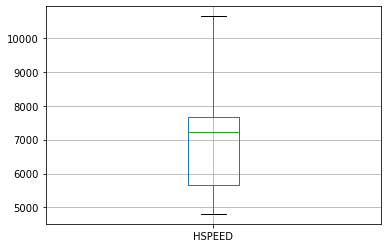

In [18]:
data.groupby('STRAIN').mean().boxplot('HSPEED')